In [1]:
pip install -q git+https://github.com/tensorflow/docs

In [2]:
import urllib

In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers

AUTOTUNE = tf.data.experimental.AUTOTUNE

In [4]:
AUTOTUNE = tf.data.experimental.AUTOTUNE


In [5]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots

import tensorflow_datasets as tfds

import PIL.Image
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['figure.figsize'] = (12,5)

import numpy as np

In [6]:
image_path = tf.keras.utils.get_file("cat.jpg", "https://storage.googleapis.com/download.tensorflow.org/example_images/320px-Felis_catus-cat_on_snow.jpg")

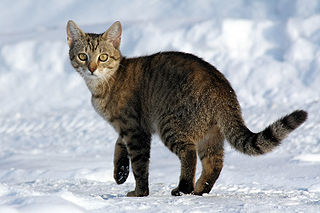

In [7]:
PIL.Image.open(image_path)

In [8]:
image_string = tf.io.read_file(image_path)

In [9]:
image = tf.image.decode_jpeg(image_string,channels=3)

In [10]:
def visualize(original , augmented):
    fig = plt.figure()
    plt.subplot(1,2,1)
    plt.title('Original image')
    plt.imshow(original)
    
    plt.subplot(1,2,2)
    plt.title("Augmented Image")
    plt.imshow(augmented)

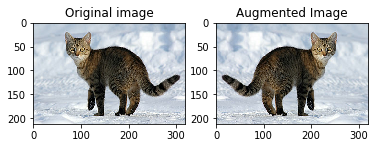

In [11]:
flipped = tf.image.flip_left_right(image)
visualize(image,flipped)

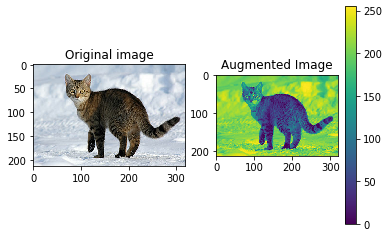

In [12]:
grayscaled = tf.image.rgb_to_grayscale(image)
visualize(image,tf.squeeze(grayscaled))
plt.colorbar()

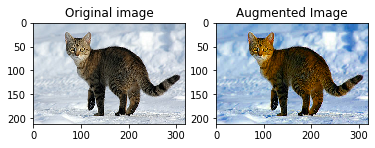

In [13]:
saturated = tf.image.adjust_saturation(image, 3)
visualize(image,saturated)

In [14]:
brightness = tf.image.adjust_brightness(image,0.2)

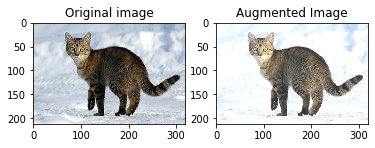

In [15]:
visualize(image,brightness)

In [16]:
rotated = tf.image.rot90(image)

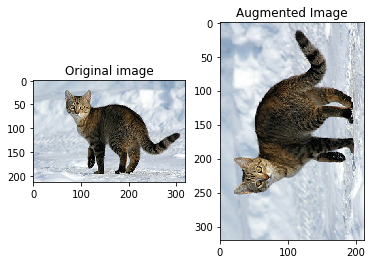

In [17]:
visualize(image,rotated)

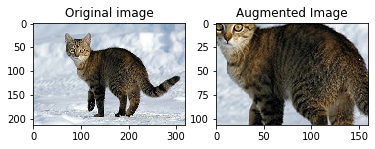

In [18]:
cropped = tf.image.central_crop(image , central_fraction=0.5)
visualize(image,cropped)

In [25]:
dataset, info =  tfds.load('mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

num_train_examples= info.splits['train'].num_examples

In [26]:
num_train_examples

60000

In [30]:
def convert(image, label):
  image = tf.image.convert_image_dtype(image, tf.float32) # Cast and normalize the image to [0,1]
  return image, label

def augment(image,label):
  image,label = convert(image, label)
  image = tf.image.convert_image_dtype(image, tf.float32) # Cast and normalize the image to [0,1]
  image = tf.image.resize_with_crop_or_pad(image, 34, 34) # Add 6 pixels of padding
  image = tf.image.random_crop(image, size=[28, 28, 1]) # Random crop back to 28x28
  image = tf.image.random_brightness(image, max_delta=0.5) # Random brightness

  return image,label

In [31]:
batch_size = 64
Num_examples = 2048

In [32]:
augmented_train_batches = (
    train_dataset
    # Only train on a subset, so you can quickly see the effect.
    .take(Num_examples)
    .cache()
    .shuffle(num_train_examples//4)
    # The augmentation is added here.
    .map(augment, num_parallel_calls=AUTOTUNE)
    .batch(batch_size)
    .prefetch(AUTOTUNE)
) 

In [33]:
non_augmented_train_batches = (
    train_dataset
    # Only train on a subset, so you can quickly see the effect.
    .take(Num_examples)
    .cache()
    .shuffle(num_train_examples//4)
    # No augmentation.
    .map(convert, num_parallel_calls=AUTOTUNE)
    .batch(batch_size)
    .prefetch(AUTOTUNE)
)

In [34]:
validation_batches = (
    test_dataset
    .map(convert, num_parallel_calls=AUTOTUNE)
    .batch(2*batch_size)
)

In [35]:
def make_model():
    model = tf.keras.Sequential([
        layers.Flatten(input_shape= (28,28,1)),
        layers.Dense(4096, activation = 'relu'),
        layers.Dense(4096, activation = 'relu'),
        layers.Dense(10)
    ])
    model.compile(optimizer='adam',
                 loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
                 metrics=['accuracy'])
    return model

In [38]:
model_without_aug = make_model()
no_aug_history = model_without_aug.fit(non_augmented_train_batches,epochs = 50,validation_data = validation_batches,verbose = 1)

Epoch 1/50
32/32 [==============================].3296 - accuracy: 0.04 - 2s 1s/step - loss: 2.3196 - accuracy: 0.16 - 3s 915ms/step - loss: 2.3103 - accuracy: 0.239 - 3s 729ms/step - loss: 2.1865 - accuracy: 0.293 - 3s 619ms/step - loss: 2.0462 - accuracy: 0.365 - 3s 551ms/step - loss: 1.8676 - accuracy: 0.434 - 4s 502ms/step - loss: 1.7315 - accuracy: 0.471 - 4s 471ms/step - loss: 1.6218 - accuracy: 0.503 - 4s 437ms/step - loss: 1.5100 - accuracy: 0.541 - 4s 414ms/step - loss: 1.4262 - accuracy: 0.567 - 4s 394ms/step - loss: 1.3782 - accuracy: 0.576 - 5s 378ms/step - loss: 1.3292 - accuracy: 0.585 - 5s 364ms/step - loss: 1.2786 - accuracy: 0.601 - 5s 353ms/step - loss: 1.2166 - accuracy: 0.625 - 5s 342ms/step - loss: 1.1993 - accuracy: 0.627 - 5s 333ms/step - loss: 1.1598 - accuracy: 0.639 - 6s 325ms/step - loss: 1.1189 - accuracy: 0.653 - 6s 319ms/step - loss: 1.0823 - accuracy: 0.664 - 6s 314ms/step - loss: 1.0545 - accuracy: 0.675 - 6s 309ms/step - loss: 1.0280 - accuracy: 0.682 -

32/32 [==============================] - ETA: 22s - loss: 0.0294 - accuracy: 0.984 - ETA: 19s - loss: 0.0348 - accuracy: 0.984 - ETA: 18s - loss: 0.0319 - accuracy: 0.984 - ETA: 16s - loss: 0.0371 - accuracy: 0.984 - ETA: 16s - loss: 0.0305 - accuracy: 0.987 - ETA: 15s - loss: 0.0269 - accuracy: 0.989 - ETA: 15s - loss: 0.0258 - accuracy: 0.991 - ETA: 15s - loss: 0.0230 - accuracy: 0.992 - ETA: 15s - loss: 0.0242 - accuracy: 0.991 - ETA: 14s - loss: 0.0412 - accuracy: 0.989 - ETA: 14s - loss: 0.0392 - accuracy: 0.990 - ETA: 14s - loss: 0.0372 - accuracy: 0.990 - ETA: 13s - loss: 0.0407 - accuracy: 0.989 - ETA: 13s - loss: 0.0540 - accuracy: 0.987 - ETA: 13s - loss: 0.0567 - accuracy: 0.985 - ETA: 13s - loss: 0.0540 - accuracy: 0.986 - ETA: 12s - loss: 0.0534 - accuracy: 0.986 - ETA: 12s - loss: 0.0545 - accuracy: 0.985 - ETA: 12s - loss: 0.0659 - accuracy: 0.981 - ETA: 12s - loss: 0.0678 - accuracy: 0.980 - ETA: 12s - loss: 0.0658 - accuracy: 0.981 - ETA: 12s - loss: 0.0634 - accuracy:

32/32 [==============================] - ETA: 29s - loss: 5.4219e-04 - accuracy: 1.000 - ETA: 19s - loss: 0.0078 - accuracy: 1.0000    - ETA: 16s - loss: 0.0053 - accuracy: 1.000 - ETA: 14s - loss: 0.0056 - accuracy: 1.000 - ETA: 13s - loss: 0.0051 - accuracy: 1.000 - ETA: 12s - loss: 0.0067 - accuracy: 0.997 - ETA: 12s - loss: 0.0059 - accuracy: 0.997 - ETA: 12s - loss: 0.0052 - accuracy: 0.998 - ETA: 12s - loss: 0.0052 - accuracy: 0.998 - ETA: 12s - loss: 0.0050 - accuracy: 0.998 - ETA: 12s - loss: 0.0052 - accuracy: 0.998 - ETA: 12s - loss: 0.0064 - accuracy: 0.997 - ETA: 12s - loss: 0.0060 - accuracy: 0.997 - ETA: 12s - loss: 0.0057 - accuracy: 0.997 - ETA: 11s - loss: 0.0060 - accuracy: 0.997 - ETA: 11s - loss: 0.0059 - accuracy: 0.998 - ETA: 11s - loss: 0.0058 - accuracy: 0.998 - ETA: 11s - loss: 0.0055 - accuracy: 0.998 - ETA: 11s - loss: 0.0066 - accuracy: 0.997 - ETA: 10s - loss: 0.0065 - accuracy: 0.997 - ETA: 10s - loss: 0.0062 - accuracy: 0.997 - ETA: 10s - loss: 0.0064 - a

32/32 [==============================] - ETA: 18s - loss: 0.0735 - accuracy: 0.968 - ETA: 13s - loss: 0.0369 - accuracy: 0.984 - ETA: 11s - loss: 0.0281 - accuracy: 0.989 - ETA: 10s - loss: 0.0517 - accuracy: 0.988 - ETA: 10s - loss: 0.0419 - accuracy: 0.990 - ETA: 9s - loss: 0.0433 - accuracy: 0.989 - ETA: 9s - loss: 0.0400 - accuracy: 0.98 - ETA: 9s - loss: 0.0385 - accuracy: 0.98 - ETA: 9s - loss: 0.0469 - accuracy: 0.98 - ETA: 8s - loss: 0.0423 - accuracy: 0.98 - ETA: 8s - loss: 0.0426 - accuracy: 0.98 - ETA: 8s - loss: 0.0415 - accuracy: 0.98 - ETA: 8s - loss: 0.0480 - accuracy: 0.98 - ETA: 8s - loss: 0.0534 - accuracy: 0.98 - ETA: 7s - loss: 0.0499 - accuracy: 0.98 - ETA: 7s - loss: 0.0614 - accuracy: 0.98 - ETA: 7s - loss: 0.0626 - accuracy: 0.98 - ETA: 7s - loss: 0.0612 - accuracy: 0.98 - ETA: 7s - loss: 0.0647 - accuracy: 0.98 - ETA: 7s - loss: 0.0626 - accuracy: 0.98 - ETA: 7s - loss: 0.0617 - accuracy: 0.98 - ETA: 6s - loss: 0.0597 - accuracy: 0.98 - ETA: 6s - loss: 0.0579 -

32/32 [==============================] - ETA: 18s - loss: 2.3510e-04 - accuracy: 1.000 - ETA: 13s - loss: 2.3611e-04 - accuracy: 1.000 - ETA: 11s - loss: 1.7411e-04 - accuracy: 1.000 - ETA: 11s - loss: 1.8339e-04 - accuracy: 1.000 - ETA: 10s - loss: 1.8669e-04 - accuracy: 1.000 - ETA: 10s - loss: 1.6528e-04 - accuracy: 1.000 - ETA: 9s - loss: 1.5555e-04 - accuracy: 1.000 - ETA: 9s - loss: 2.0695e-04 - accuracy: 1.00 - ETA: 9s - loss: 0.0023 - accuracy: 0.9983   - ETA: 9s - loss: 0.0021 - accuracy: 0.99 - ETA: 9s - loss: 0.0020 - accuracy: 0.99 - ETA: 8s - loss: 0.0019 - accuracy: 0.99 - ETA: 8s - loss: 0.0018 - accuracy: 0.99 - ETA: 8s - loss: 0.0017 - accuracy: 0.99 - ETA: 8s - loss: 0.0016 - accuracy: 0.99 - ETA: 8s - loss: 0.0015 - accuracy: 0.99 - ETA: 7s - loss: 0.0014 - accuracy: 0.99 - ETA: 7s - loss: 0.0014 - accuracy: 0.99 - ETA: 7s - loss: 0.0013 - accuracy: 0.99 - ETA: 7s - loss: 0.0013 - accuracy: 0.99 - ETA: 7s - loss: 0.0014 - accuracy: 0.99 - ETA: 7s - loss: 0.0014 - acc

32/32 [==============================] - ETA: 17s - loss: 1.8224e-04 - accuracy: 1.000 - ETA: 12s - loss: 1.2439e-04 - accuracy: 1.000 - ETA: 11s - loss: 1.0309e-04 - accuracy: 1.000 - ETA: 10s - loss: 8.7027e-05 - accuracy: 1.000 - ETA: 10s - loss: 8.4990e-05 - accuracy: 1.000 - ETA: 9s - loss: 7.5879e-05 - accuracy: 1.000 - ETA: 9s - loss: 6.9915e-05 - accuracy: 1.00 - ETA: 9s - loss: 6.8712e-05 - accuracy: 1.00 - ETA: 8s - loss: 6.2324e-05 - accuracy: 1.00 - ETA: 8s - loss: 6.1089e-05 - accuracy: 1.00 - ETA: 8s - loss: 5.6630e-05 - accuracy: 1.00 - ETA: 8s - loss: 5.4654e-05 - accuracy: 1.00 - ETA: 8s - loss: 5.2236e-05 - accuracy: 1.00 - ETA: 7s - loss: 5.1785e-05 - accuracy: 1.00 - ETA: 7s - loss: 5.2703e-05 - accuracy: 1.00 - ETA: 7s - loss: 5.2591e-05 - accuracy: 1.00 - ETA: 7s - loss: 5.2454e-05 - accuracy: 1.00 - ETA: 7s - loss: 5.2915e-05 - accuracy: 1.00 - ETA: 7s - loss: 5.2266e-05 - accuracy: 1.00 - ETA: 7s - loss: 5.1059e-05 - accuracy: 1.00 - ETA: 6s - loss: 5.2507e-05 -

32/32 [==============================] - ETA: 17s - loss: 1.7640e-05 - accuracy: 1.000 - ETA: 13s - loss: 1.1331e-05 - accuracy: 1.000 - ETA: 11s - loss: 9.5035e-06 - accuracy: 1.000 - ETA: 10s - loss: 1.0026e-05 - accuracy: 1.000 - ETA: 10s - loss: 1.6714e-05 - accuracy: 1.000 - ETA: 9s - loss: 2.2898e-05 - accuracy: 1.000 - ETA: 9s - loss: 2.1233e-05 - accuracy: 1.00 - ETA: 9s - loss: 2.1716e-05 - accuracy: 1.00 - ETA: 8s - loss: 2.3365e-05 - accuracy: 1.00 - ETA: 8s - loss: 2.2174e-05 - accuracy: 1.00 - ETA: 8s - loss: 2.3532e-05 - accuracy: 1.00 - ETA: 8s - loss: 2.5687e-05 - accuracy: 1.00 - ETA: 8s - loss: 2.4417e-05 - accuracy: 1.00 - ETA: 7s - loss: 2.3616e-05 - accuracy: 1.00 - ETA: 7s - loss: 2.3392e-05 - accuracy: 1.00 - ETA: 7s - loss: 2.3450e-05 - accuracy: 1.00 - ETA: 7s - loss: 2.4209e-05 - accuracy: 1.00 - ETA: 7s - loss: 2.4255e-05 - accuracy: 1.00 - ETA: 7s - loss: 2.4838e-05 - accuracy: 1.00 - ETA: 6s - loss: 2.4463e-05 - accuracy: 1.00 - ETA: 6s - loss: 2.4121e-05 -

32/32 [==============================] - ETA: 18s - loss: 2.4233e-05 - accuracy: 1.000 - ETA: 13s - loss: 1.7264e-05 - accuracy: 1.000 - ETA: 11s - loss: 1.8530e-05 - accuracy: 1.000 - ETA: 10s - loss: 2.3204e-05 - accuracy: 1.000 - ETA: 10s - loss: 2.2965e-05 - accuracy: 1.000 - ETA: 9s - loss: 2.2107e-05 - accuracy: 1.000 - ETA: 9s - loss: 2.5102e-05 - accuracy: 1.00 - ETA: 9s - loss: 2.2885e-05 - accuracy: 1.00 - ETA: 8s - loss: 2.1837e-05 - accuracy: 1.00 - ETA: 8s - loss: 2.1262e-05 - accuracy: 1.00 - ETA: 8s - loss: 2.2485e-05 - accuracy: 1.00 - ETA: 8s - loss: 2.2234e-05 - accuracy: 1.00 - ETA: 8s - loss: 2.1071e-05 - accuracy: 1.00 - ETA: 7s - loss: 2.0580e-05 - accuracy: 1.00 - ETA: 7s - loss: 2.3031e-05 - accuracy: 1.00 - ETA: 7s - loss: 2.2585e-05 - accuracy: 1.00 - ETA: 7s - loss: 2.2438e-05 - accuracy: 1.00 - ETA: 7s - loss: 2.2227e-05 - accuracy: 1.00 - ETA: 7s - loss: 2.1903e-05 - accuracy: 1.00 - ETA: 7s - loss: 2.2784e-05 - accuracy: 1.00 - ETA: 6s - loss: 2.2853e-05 -

Epoch 41/50
32/32 [==============================] - ETA: 18s - loss: 1.4678e-05 - accuracy: 1.000 - ETA: 13s - loss: 1.5930e-05 - accuracy: 1.000 - ETA: 12s - loss: 1.7631e-05 - accuracy: 1.000 - ETA: 10s - loss: 1.6696e-05 - accuracy: 1.000 - ETA: 10s - loss: 1.4595e-05 - accuracy: 1.000 - ETA: 9s - loss: 1.7434e-05 - accuracy: 1.000 - ETA: 9s - loss: 1.6203e-05 - accuracy: 1.00 - ETA: 9s - loss: 1.5071e-05 - accuracy: 1.00 - ETA: 9s - loss: 1.6350e-05 - accuracy: 1.00 - ETA: 8s - loss: 1.5182e-05 - accuracy: 1.00 - ETA: 8s - loss: 1.4398e-05 - accuracy: 1.00 - ETA: 8s - loss: 1.3900e-05 - accuracy: 1.00 - ETA: 8s - loss: 1.4045e-05 - accuracy: 1.00 - ETA: 7s - loss: 1.4108e-05 - accuracy: 1.00 - ETA: 7s - loss: 1.4440e-05 - accuracy: 1.00 - ETA: 7s - loss: 1.4899e-05 - accuracy: 1.00 - ETA: 7s - loss: 1.4605e-05 - accuracy: 1.00 - ETA: 7s - loss: 1.4306e-05 - accuracy: 1.00 - ETA: 7s - loss: 1.4055e-05 - accuracy: 1.00 - ETA: 7s - loss: 1.4407e-05 - accuracy: 1.00 - ETA: 6s - loss: 

Epoch 46/50
32/32 [==============================] - ETA: 18s - loss: 1.5870e-05 - accuracy: 1.000 - ETA: 13s - loss: 1.1719e-05 - accuracy: 1.000 - ETA: 11s - loss: 1.1758e-05 - accuracy: 1.000 - ETA: 10s - loss: 1.0005e-05 - accuracy: 1.000 - ETA: 10s - loss: 9.9149e-06 - accuracy: 1.000 - ETA: 9s - loss: 9.1204e-06 - accuracy: 1.000 - ETA: 9s - loss: 8.3648e-06 - accuracy: 1.00 - ETA: 9s - loss: 1.1036e-05 - accuracy: 1.00 - ETA: 8s - loss: 1.0755e-05 - accuracy: 1.00 - ETA: 8s - loss: 1.0655e-05 - accuracy: 1.00 - ETA: 8s - loss: 1.0304e-05 - accuracy: 1.00 - ETA: 8s - loss: 1.0378e-05 - accuracy: 1.00 - ETA: 7s - loss: 1.0274e-05 - accuracy: 1.00 - ETA: 7s - loss: 1.0771e-05 - accuracy: 1.00 - ETA: 7s - loss: 1.0966e-05 - accuracy: 1.00 - ETA: 7s - loss: 1.0885e-05 - accuracy: 1.00 - ETA: 7s - loss: 1.0895e-05 - accuracy: 1.00 - ETA: 7s - loss: 1.0787e-05 - accuracy: 1.00 - ETA: 7s - loss: 1.0497e-05 - accuracy: 1.00 - ETA: 6s - loss: 1.0202e-05 - accuracy: 1.00 - ETA: 6s - loss: 

In [ ]:
model_with_aug = make_model()

aug_history = model_with_aug.fit(augmented_train_batches, epochs=50, validation_data=validation_batches,verbose = 0)